## Stock Market Prediction And Forecasting Using Stacked LSTM

Dataset link: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

## Tasks:
    
    1. Load the dataset
    2. Data Observation
    3. Feature Selection
    4. Feature Scaling -- MinMax Scaler
    5. Split the Dataset into train and test data
    6. Creating a time series dataset matrix
    7. LSTM model creation
    8. Data Prediction

### Loading the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')

### Data Observation

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
min(df.Date)

'2010-07-21'

In [9]:
max(df.Date)

'2018-09-28'

#### Observations
1. There are no null values in the dataset
2. All records are unique
3. Dataset ranges between '2010-07-21' to '2018-09-28'


### Feature Selection

In [10]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


1. dataset is sorted in descending order with respect to dates [need to be sorted]
2. we can use 'Close' as a feature for our model prediction

In [11]:
df = df.sort_values(by = 'Date')

In [12]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [13]:
df1 = df.reset_index()['Close']

In [14]:
df1

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [15]:
import matplotlib.pyplot as plt

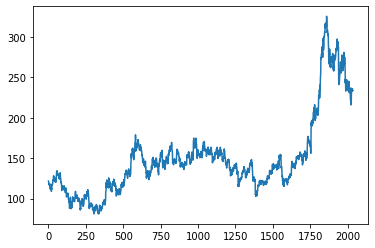

In [16]:
plt.plot(df1)

### Feature Scaling

LSTM are sensitive to the scale of the data, so we will use MinMax Scaler to scale the data between(0,1)

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

### Train and Test data

lets set train data to be 70% and test data 30%

In [20]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size

In [21]:
train_data , test_data = df1[:training_size,:] , df1[training_size:len(df1),:1]

In [22]:
len(train_data)

1424

In [23]:
len(test_data)

611

### Time Series Data Matrix

data = [20,30,40,50,60,70,80,90]

let time_step = 3

#### time series matrix



20 30 40 -- 50

30 40 50 -- 60

40 50 60 -- 70

50 60 70 -- 80

60 70 80 -- 90

In [24]:
def create_matrix(data,timesteps):
    X_data , y_data = [] , []
    for i in range(len(data)-timesteps-1):
        val = data[i:(i+timesteps),0]
        X_data.append(val)
        y_data.append(data[i+timesteps,0])
    return np.array(X_data) , np.array(y_data)

In [25]:
timestep = 100
X_train, y_train = create_matrix(train_data,timestep)
X_test, y_test = create_matrix(test_data,timestep)

In [26]:
X_train.shape,X_test.shape

((1323, 100), (510, 100))

In [27]:
y_train.shape,y_test.shape

((1323,), (510,))

rehaping train and test data, which is essential for LSTM model
---> [sample_data,time steps,features]

In [28]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [29]:
X_train.shape , X_test.shape

((1323, 100, 1), (510, 100, 1))

### LSTM model creation

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2022-07-15 20:59:29.571754: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-15 20:59:29.571779: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [31]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam')

2022-07-15 20:59:30.909578: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-15 20:59:30.909616: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-15 20:59:30.909642: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (raj-lenovo-ideapad): /proc/driver/nvidia/version does not exist
2022-07-15 20:59:30.909968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
## Training recurrent neural network
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 8s 167ms/step - loss: 0.0106 - val_loss: 0.0280
Epoch 2/100
21/21 [==============================] - 2s 117ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 3/100
21/21 [==============================] - 2s 118ms/step - loss: 9.4582e-04 - val_loss: 0.0051
Epoch 4/100
21/21 [==============================] - 2s 119ms/step - loss: 8.6841e-04 - val_loss: 0.0049
Epoch 5/100
21/21 [==============================] - 2s 118ms/step - loss: 8.2375e-04 - val_loss: 0.0043
Epoch 6/100
21/21 [==============================] - 2s 118ms/step - loss: 7.9663e-04 - val_loss: 0.0039
Epoch 7/100
21/21 [==============================] - 2s 118ms/step - loss: 7.7125e-04 - val_loss: 0.0030
Epoch 8/100
21/21 [==============================] - 2s 119ms/step - loss: 7.3377e-04 - val_loss: 0.0044
Epoch 9/100
21/21 [==============================] - 2s 119ms/step - loss: 7.0016e-04 - val_loss: 0.0048
Epoch 10/100
21/21 [==============================] - 3s 120ms/

Epoch 78/100
21/21 [==============================] - 3s 127ms/step - loss: 1.4226e-04 - val_loss: 7.6964e-04
Epoch 79/100
21/21 [==============================] - 3s 126ms/step - loss: 1.4671e-04 - val_loss: 6.4005e-04
Epoch 80/100
21/21 [==============================] - 3s 127ms/step - loss: 1.3936e-04 - val_loss: 8.7620e-04
Epoch 81/100
21/21 [==============================] - 3s 128ms/step - loss: 1.3512e-04 - val_loss: 0.0016
Epoch 82/100
21/21 [==============================] - 3s 127ms/step - loss: 1.3688e-04 - val_loss: 9.4877e-04
Epoch 83/100
21/21 [==============================] - 3s 127ms/step - loss: 1.3485e-04 - val_loss: 9.8674e-04
Epoch 84/100
21/21 [==============================] - 3s 126ms/step - loss: 1.3975e-04 - val_loss: 9.3607e-04
Epoch 85/100
21/21 [==============================] - 3s 126ms/step - loss: 1.3660e-04 - val_loss: 0.0011
Epoch 86/100
21/21 [==============================] - 3s 127ms/step - loss: 1.3922e-04 - val_loss: 0.0011
Epoch 87/100
21/21 [==

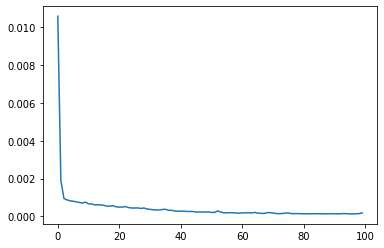

In [34]:
## plotting loss
plt.plot(model.history.history['loss'])

### Prediction

In [35]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 29ms/step


In [36]:
## transform data to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [37]:
look_back = 100

In [38]:
training_plot = np.empty_like(df1)
training_plot[:,:] = np.nan
training_plot[look_back:len(train_predict) + look_back] = train_predict

In [39]:
test_plot = np.empty_like(df1)
test_plot[:,:] = np.nan
test_plot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

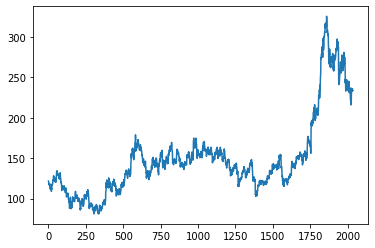

In [40]:
## original plot
plt.plot(scaler.inverse_transform(df1))

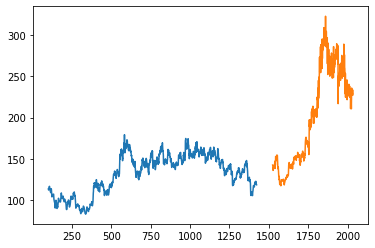

In [41]:
## predicted plot
plt.plot(training_plot)
plt.plot(test_plot)

### Calculate RMSE performance metrics

In [42]:
import math
from sklearn.metrics import mean_squared_error


In [43]:
math.sqrt(mean_squared_error(y_train,train_predict))

134.25935030968404

In [44]:
math.sqrt(mean_squared_error(y_test,test_predict))

208.57208565494207

### prediction of next 100 days price

In [45]:
len(test_data)

611

In [46]:
##last 100 days data for further predictions
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [47]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
len(temp_input)

100

In [48]:
output = []
steps = 100 ## same as timesteps
i = 0
while i<100:
    if (len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,steps,1))
        y_hat = model.predict(x_input,verbose=0)
        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1:]
        output.extend(y_hat.tolist())
        i+=1
    else:
        x_input = x_input.reshape((1,steps,1))
        y_hat = model.predict(x_input,verbose=0)
        temp_input.extend(y_hat[0].tolist())
        output.extend(y_hat.tolist())
        i+=1

In [49]:
len(output)

100

In [50]:
df2 = df1.tolist()
df2.extend(output)

In [51]:
day_new = np.arange(1,101)
day_pred = np.arange(101,201)

In [52]:
len(df1)

2035

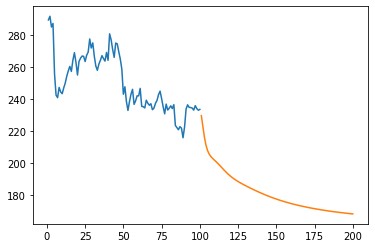

In [53]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(output))

In [54]:
len(df2)

2135

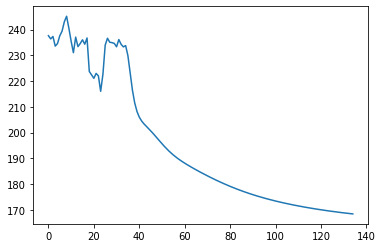

In [57]:
plt.plot(scaler.inverse_transform(df2[2000:]))